<a href="https://colab.research.google.com/github/esthernwagborogu/Adidas-Sales-Data/blob/main/MMG_dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install fuzzywuzzy
import pandas as pd
import matplotlib.pyplot as plt # Added this line
from fuzzywuzzy import fuzz, process

In [31]:
df1 = pd.read_csv("/content/Reviews0321.csv")  # Replace with your file path
df1.head() # Changed df to df1

,Creator
0,kgil0509@gmail.com
1,melissa@gmail.com
2,kimberleyfisher@gmail.com
3,kimberleyfisher@gmail.com
4,annapatel@gmail.com


In [6]:
df2 = pd.read_csv("/content/Clinics0321.csv")  # Replace with your file path
df2.head()

,Account-User-Creator,Address,Features,Name,Specialty
0,blacklineads@gmail.com,"Königsallee 45, 40212 Düsseldorf, Germany","All-Inclusive Packages , Telemedicine Services...",Aesthetica Surgery Center,Cosmetic Surgery
1,clinic101@gmail.com,"Archbishop Makarios III, Paramytha 4540, Cyprus","All-Inclusive Packages , Telemedicine Services...",Adriatic Fertility Partners,"Surrogacy , Fertility"
2,customerhappiness@edenaesthetics.ae,Bay View Tower - Business Bay - Dubai - United...,"All-Inclusive Packages , Telemedicine Services...",EDEN AESTHETICS CLINIC,"Dental Care , Cosmetic Surgery , Wellness & Pr..."
3,ananburanasiri@gmail.com,"123 Soi Sukhumvit 24, Khwaeng Khlong Tan, Khet...","All-Inclusive Packages , Financing Options , L...",Bangkok Dental Haven,"Dental Care , Cosmetic Dentistry , Orthodontic..."
4,amirazulkifli@gmail.com,"KL Eco City Road, 59200 Kuala Lumpur, Wilayah ...","All-Inclusive Packages , Multilingual Staff , ...",Radiance Medical Aesthetics,"Cosmetic Surgery , Other Medical Services"


In [13]:
# Count contributions from clinic creators
clinic_counts = df2["Account-User-Creator"].value_counts().reset_index() # Changed clinics_df to df2
clinic_counts.columns = ["User", "Clinic_Entries"]
clinic_counts

,User,Clinic_Entries
0,tijanioluwadunni@gmail.com,204
1,mimidaniel05@gmail.com,163
2,kbarbeau@live.maryville.edu,145
3,renike.mariam@gmail.com,116
4,ariyikeoluwatomiyin@gmail.com,109
...,...,...
123,akanderhodab@gmail.com,1
124,adegbolaola1@gmail.com,1
125,kexinzhang16@gmail.com,1
126,avenwang.official@gmail.com,1


In [12]:
# Count contributions from review creators
review_counts = df1["Creator"].value_counts().reset_index()
review_counts.columns = ["User", "Reviews"]
review_counts

,User,Reviews
0,a.gilnetworking@gmail.com,118
1,snehaven@buffalo.edu,112
2,toluowo96@gmail.com,45
3,ssimh003@fiu.edu,40
4,oludipevictor@gmail.com,33
5,balakrishnajurollu@gmail.com,14
6,arpita.chatterjeeusa@gmail.com,9
7,alexchen@wustl.edu,5
8,hemanthms08@gmail.com,4
9,favourmoses471@gmail.com,3


In [11]:
contribution_df = pd.merge(clinic_counts, review_counts, on="User", how="outer").fillna(0)
contribution_df

,User,Clinic_Entries,Reviews
0,(deleted thing),3.0,0.0
1,578134277@qq.com,7.0,0.0
2,a.gilnetworking@gmail.com,59.0,118.0
3,abdulgafarmus0808@gmail.com,5.0,0.0
4,adegbolaola1@gmail.com,1.0,0.0
...,...,...,...
165,valentinaarmstrong0802@gmail.com,99.0,0.0
166,vedrandumbović@gmail.com,0.0,1.0
167,wambuigitau038@gmail.com,35.0,0.0
168,yanww.61@gmail.com,7.0,0.0


In [14]:
# Convert counts to integer type
contribution_df["Clinic_Entries"] = contribution_df["Clinic_Entries"].astype(int)
contribution_df["Reviews"] = contribution_df["Reviews"].astype(int)

In [16]:
# Calculate total contributions
contribution_df["Total_Contributions"] = contribution_df["Clinic_Entries"] + contribution_df["Reviews"]
contribution_df["Total_Contributions"]

,Total_Contributions
0,3
1,7
2,177
3,5
4,1
...,...
165,99
166,1
167,35
168,7


In [19]:
top_contributors = contribution_df.sort_values(by="Total_Contributions", ascending=False)
top_contributors = top_contributors.head(10)
top_contributors

,User,Clinic_Entries,Reviews,Total_Contributions
161,tijanioluwadunni@gmail.com,204,0,204
2,a.gilnetworking@gmail.com,59,118,177
110,mimidaniel05@gmail.com,163,0,163
88,kbarbeau@live.maryville.edu,145,0,145
154,snehaven@buffalo.edu,10,112,122
138,renike.mariam@gmail.com,116,0,116
20,ariyikeoluwatomiyin@gmail.com,109,0,109
81,josephosinachi213@gmail.com,100,0,100
165,valentinaarmstrong0802@gmail.com,99,0,99
118,nehadhake11@gmail.com,80,0,80


In [36]:
# Extract country from address (assuming last word in address is the country)
df2["Country"] = df2["Address"].apply(lambda x: str(x).split(",")[-1].strip()) # Changed clinics_df to df2, which was the original name of the clinics dataframe.
df2["Country"]

,Country
0,Germany
1,Cyprus
2,Bay View Tower - Business Bay - Dubai - United...
3,Thailand
4,Malaysia
...,...
2434,Thailand
2435,Mexico
2436,Thailand
2437,Mexico


In [37]:
# Count contributions from clinic creators
clinic_counts = df2["Account-User-Creator"].value_counts().reset_index() # Changed clinics_df to df2, which stores the clinics data
clinic_counts.columns = ["User", "Clinic_Entries"]
clinic_counts

,User,Clinic_Entries
0,tijanioluwadunni@gmail.com,204
1,mimidaniel05@gmail.com,163
2,kbarbeau@live.maryville.edu,145
3,renike.mariam@gmail.com,116
4,ariyikeoluwatomiyin@gmail.com,109
...,...,...
123,akanderhodab@gmail.com,1
124,adegbolaola1@gmail.com,1
125,kexinzhang16@gmail.com,1
126,avenwang.official@gmail.com,1


In [39]:
# Identify potential duplicate clinics using exact and fuzzy matching
duplicate_entries = []
clinic_groups = df2.groupby("Country") # Changed clinics_df to df2

In [40]:
for country, group in clinic_groups:
    names = group["Name"].tolist()
    for i, name in enumerate(names):
        for j in range(i + 1, len(names)):
            score = fuzz.ratio(name.lower(), names[j].lower())
            if score > 85:  # Threshold for near-duplicate detection
                duplicate_entries.append((name, names[j], country))

In [42]:
# Convert to DataFrame
duplicates_df = pd.DataFrame(duplicate_entries, columns=["Clinic_1", "Clinic_2", "Country"])
duplicates_df

,Clinic_1,Clinic_2,Country
0,Save on Dental Care - SODC Dental Clinic,Save on Dental Care - SODC Dental Clinic,1134 Hungary
1,24 Hours Dental Clinic,24 Hours Dental Clinic,3 62nd St - Al Barsha - Al Barsha 3 - Dubai - ...
2,SameDay Dental Implants,SameDay Dental Implants,5663+6PV - Umm Suqeim - Dubai - United Arab Em...
3,HD Dental,HD-Dental,9200 Hungary
4,NSW Cardiology,NSW Cardiology,Australia
...,...,...,...
815,Lush Medical Aesthetics,AGELESS MEDICAL AESTHETICS,USA
816,Grand Aesthetics,GRAND AESTHETICS,USA
817,TidalHealth Richard A. Henson Cancer Institute...,TidalHealth Richard A. Henson Cancer Institute...,USA
818,Larson Plastic Surgery,Brown Plastic Surgery,USA


In [44]:
# Save suspected duplicates to CSV
duplicates_df.to_csv("duplicate_clinics.csv", index=False)

In [45]:
top_contributors.head(10)

,User,Clinic_Entries,Reviews,Total_Contributions
161,tijanioluwadunni@gmail.com,204,0,204
2,a.gilnetworking@gmail.com,59,118,177
110,mimidaniel05@gmail.com,163,0,163
88,kbarbeau@live.maryville.edu,145,0,145
154,snehaven@buffalo.edu,10,112,122
138,renike.mariam@gmail.com,116,0,116
20,ariyikeoluwatomiyin@gmail.com,109,0,109
81,josephosinachi213@gmail.com,100,0,100
165,valentinaarmstrong0802@gmail.com,99,0,99
118,nehadhake11@gmail.com,80,0,80


<Figure size 1200x600 with 0 Axes>

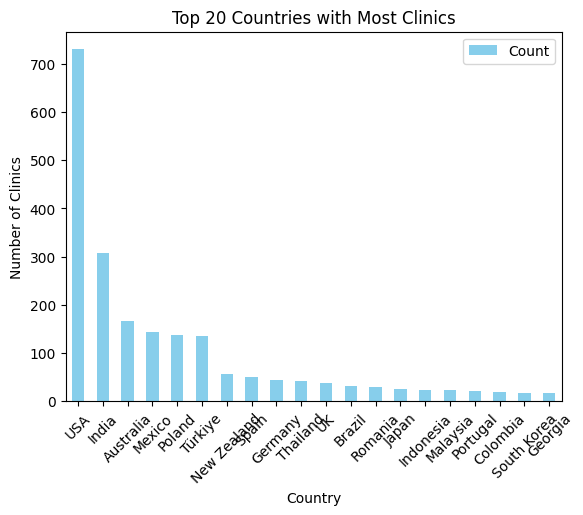

In [49]:
# Plot bar chart
plt.figure(figsize=(12, 6))
# Create country_counts DataFrame before plotting
country_counts = df2["Country"].value_counts().reset_index() # Calculate country counts from df2
country_counts.columns = ["Country", "Count"] # Rename columns
country_counts.head(20).plot(kind="bar", color="skyblue", x="Country", y="Count") # Plot with x and y specified
plt.xlabel("Country")
plt.ylabel("Number of Clinics")
plt.title("Top 20 Countries with Most Clinics")
plt.xticks(rotation=45)
plt.show()

In [52]:
# Analyze the frequency of each specialty
specialty_counts = df2["Specialty"].value_counts()
specialty_counts

,count
Specialty,
Fertility,255
Cosmetic Surgery,247
Cancer Treatment,187
"Dental Care , Cosmetic Dentistry",171
Dental Care,143
...,...
"Cancer Treatment , Allergy and Immunology",1
"Cosmetic Surgery , Orthopedic Surgery , Cardiology , Pediatrics , Gastroenterology , Urology , Pain Management , Gynecology",1
"Dental Care , Cosmetic Surgery , Cardiology , Dermatology , Endocrinology , Gastroenterology , Urology , Nephrology , Psychiatry and Mental Health , General Surgeries , Obstetrics",1


In [54]:
# Identify popular and rare specialties
popular_specialties = specialty_counts.head(10)
popular_specialties

,count
Specialty,
Fertility,255
Cosmetic Surgery,247
Cancer Treatment,187
"Dental Care , Cosmetic Dentistry",171
Dental Care,143
"Surrogacy , Fertility",103
Orthopedic Surgery,77
Cardiology,60
Transplants,29


In [55]:
rare_specialties = specialty_counts.tail(10)
rare_specialties

,count
Specialty,
"Cardiology , Dermatology , Neurology , Hospital , Pediatrics , Endocrinology , Gastroenterology , General Surgeries , Orthopedic Surgery",1
"Surrogacy , Fertility , Endocrinology , Urology , Gynecology , Other",1
"Fertility , Cardiology , Cancer Treatment , Neurology , Pediatrics , Gastroenterology , Urology , Gynecology , Obstetrics , Other",1
"Orthopedic Surgery , Cardiology , Neurology , Urology , Nephrology , Ophthalmology , General Surgeries , Gynecology , Obstetrics",1
"Cosmetic Surgery , Orthopedic Surgery , Bariatric Surgery , Gastroenterology , Urology , Ophthalmology , General Surgeries , Gynecology",1
"Cancer Treatment , Allergy and Immunology",1
"Cosmetic Surgery , Orthopedic Surgery , Cardiology , Pediatrics , Gastroenterology , Urology , Pain Management , Gynecology",1
"Dental Care , Cosmetic Surgery , Cardiology , Dermatology , Endocrinology , Gastroenterology , Urology , Nephrology , Psychiatry and Mental Health , General Surgeries , Obstetrics",1
"Fertility , Obstetrics",1


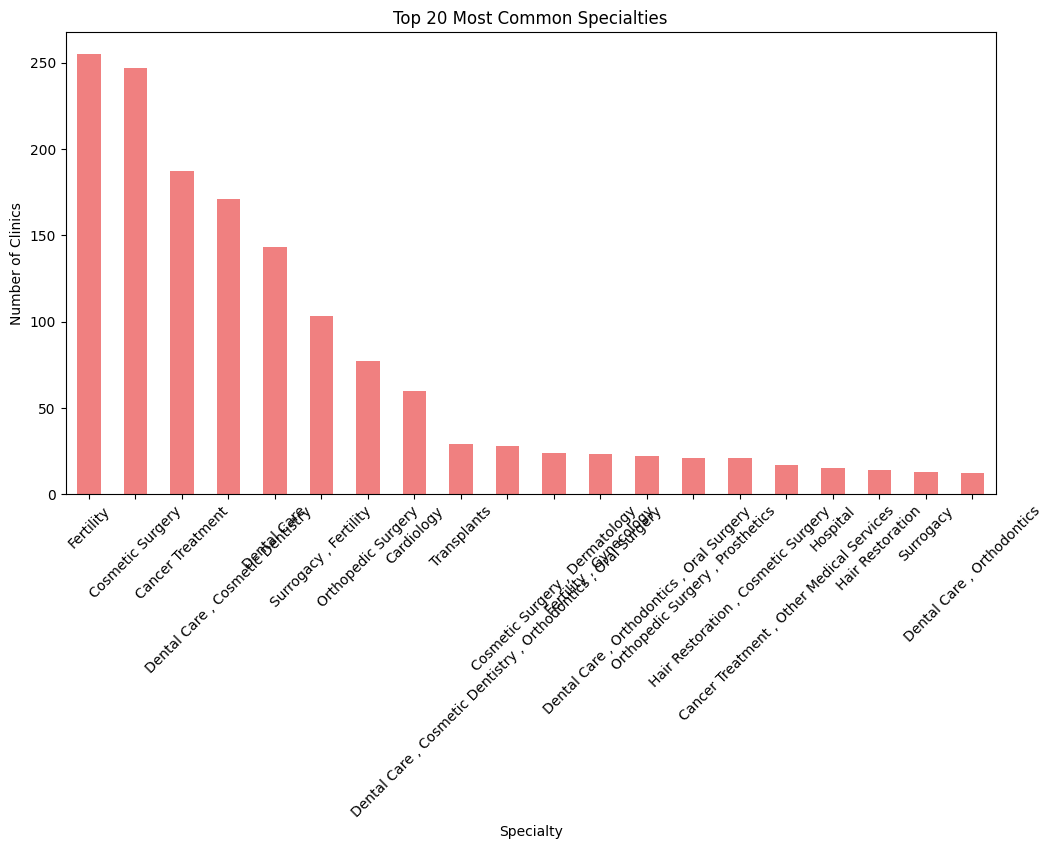

In [56]:
plt.figure(figsize=(12, 6))
specialty_counts.head(20).plot(kind="bar", color="lightcoral")
plt.xlabel("Specialty")
plt.ylabel("Number of Clinics")
plt.title("Top 20 Most Common Specialties")
plt.xticks(rotation=45)
plt.show()

In [57]:
top_contributors.head(10)

,User,Clinic_Entries,Reviews,Total_Contributions
161,tijanioluwadunni@gmail.com,204,0,204
2,a.gilnetworking@gmail.com,59,118,177
110,mimidaniel05@gmail.com,163,0,163
88,kbarbeau@live.maryville.edu,145,0,145
154,snehaven@buffalo.edu,10,112,122
138,renike.mariam@gmail.com,116,0,116
20,ariyikeoluwatomiyin@gmail.com,109,0,109
81,josephosinachi213@gmail.com,100,0,100
165,valentinaarmstrong0802@gmail.com,99,0,99
118,nehadhake11@gmail.com,80,0,80


In [58]:
print("Most Popular Specialties:\n", popular_specialties)
print("Most Rare Specialties:\n", rare_specialties)

Most Popular Specialties:
 Specialty
Fertility                                                         255
Cosmetic Surgery                                                  247
Cancer Treatment                                                  187
Dental Care , Cosmetic Dentistry                                  171
Dental Care                                                       143
Surrogacy , Fertility                                             103
Orthopedic Surgery                                                 77
Cardiology                                                         60
Transplants                                                        29
Dental Care , Cosmetic Dentistry , Orthodontics , Oral Surgery     28
Name: count, dtype: int64
Most Rare Specialties:
 Specialty
Cardiology , Dermatology , Neurology , Hospital , Pediatrics , Endocrinology , Gastroenterology , General Surgeries , Orthopedic Surgery                                               1
Surrogacy , Fertil